In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Polynomial Regression

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
   
df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


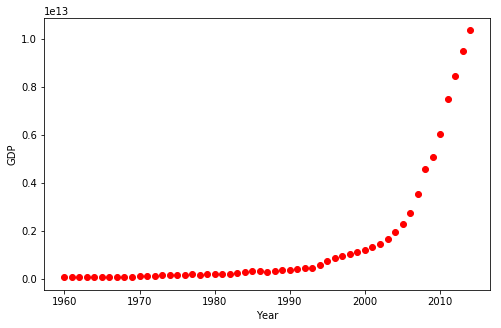

In [3]:
plt.figure(figsize=(8,5))
x_data, y_data = (df.Year.values, df.Value.values)
plt.plot(x_data,y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [4]:
x = np.asanyarray(df[['Year']]/df.Year.max())
y = np.asanyarray(df[['Value']]/df.Value.max())

In [5]:
# Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
y_predict = model.predict(x)

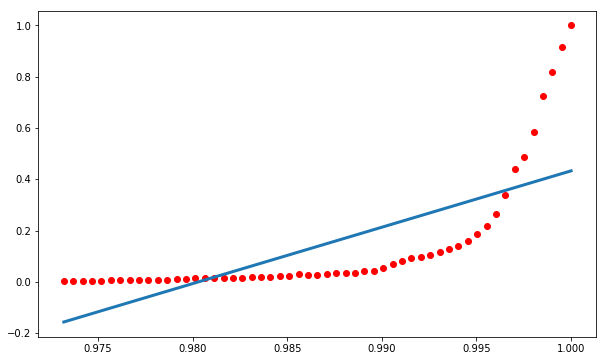

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x,y, 'ro', label='data')
plt.plot(x,y_predict, linewidth=3.0, label='fit')
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(y_predict, y))

MAE: 0.12657979406214742


In [11]:
x[0]

array([0.97318769])

In [29]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=10, include_bias=False)
x_poly = poly_features.fit_transform(x)
x_poly

array([[0.97318769, 0.94709427, 0.92170048, 0.89698756, 0.87293725,
        0.84953178, 0.82675387, 0.80458668, 0.78301385, 0.76201944],
       [0.97368421, 0.94806094, 0.92311197, 0.89881955, 0.8751664 ,
        0.85213571, 0.82971108, 0.80787658, 0.78661667, 0.76591623],
       [0.97418073, 0.9490281 , 0.9245249 , 0.90065434, 0.87740011,
        0.85474628, 0.83267736, 0.81117824, 0.79023422, 0.76983095],
       [0.97467726, 0.94999576, 0.92593926, 0.90249194, 0.87963837,
        0.85736352, 0.83565272, 0.81449171, 0.79386655, 0.77376367],
       [0.97517378, 0.95096391, 0.92735507, 0.90433235, 0.8818812 ,
        0.85998743, 0.8386372 , 0.81781701, 0.79751371, 0.77771446],
       [0.97567031, 0.95193255, 0.92877232, 0.90617558, 0.88412861,
        0.86261803, 0.8416308 , 0.82115418, 0.80117575, 0.78168339],
       [0.97616683, 0.95290168, 0.93019102, 0.90802162, 0.88638059,
        0.86525533, 0.84463356, 0.82450326, 0.80485274, 0.78567055],
       [0.97666336, 0.95387131, 0.9316111

In [30]:
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
y_predict = model.predict(x_poly)

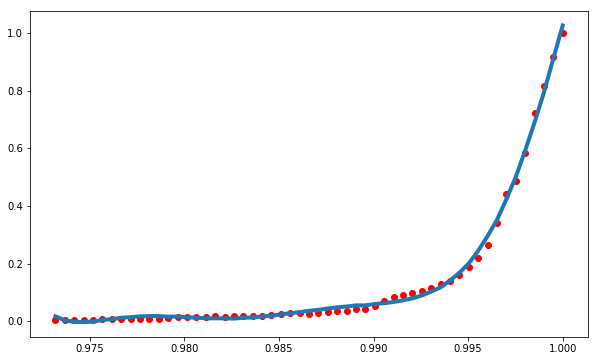

In [32]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'ro', label='data')
plt.plot(x,y_predict, linewidth=4.0, label='fit')
plt.show()

In [33]:
print("MAE:", mean_absolute_error(y_predict,y))

MAE: 0.009931725496476935


# Curve fit

In [34]:
# logistic regression
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [35]:
def sigmoid(x, beta1, beta2):
    y = 1/(1+np.exp(-beta1 * (x - beta2)))
    return y

In [36]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517103750413
beta2=0.9972071272527439


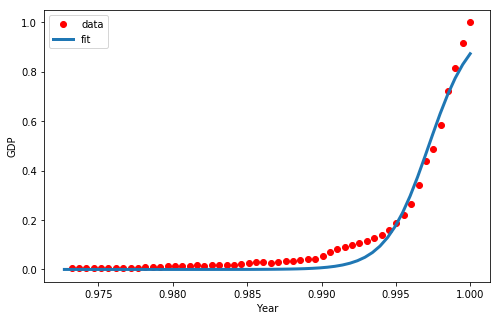

In [37]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, beta[0], beta[1])
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [38]:
print("MAE:", mean_absolute_error(yhat,ydata))

MAE: 0.03049841883042669
